<a href="https://colab.research.google.com/github/luoterolb/MIT_mod1/blob/main/Copia_de_caso_de_estudio_genoma_CE_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso de estudio 1.1: Descifrando el genoma vía PCA y K-Medias

# Descarga de datos

In [ ]:
import requests
import numpy as np
import itertools
import pandas as pd
import re
import matplotlib.pyplot as plt

from termcolor import colored

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

print("¡Librerías importadas con éxito yea!")


¡Librerías importadas con éxito yea!


In [ ]:
url = 'http://www.ihes.fr/~zinovyev/pcadg/ccrescentus.fa'
data = ''.join(requests.get(url).text.split('\r\n')[1:])
print('Comprimento do sequenciamento do genoma da Caulobacter Crescentus: {}'.format(len(data)))
print('Primeiras 25 letras do sequenciamento: {}'.format(data[:25]))

Comprimento do sequenciamento do genoma da Caulobacter Crescentus: 305400
Primeiras 25 letras do sequenciamento: gccgatagcctatgatccccggcag


**bold text**

Tal y como se describe en el guión del Caso de estudio 1.1, tanto los datos de la secuenciación genómica del *Caulobacter Crescentus*, como las funciones de MatLab utilizadas por los autores, pueden descargarse en el siguiente [link](http://www.ihes.fr/~zinovyev/pcadg/).

Mediante la librería `requests` podemos acceder a dicha secuenciación y transformarla en una `string` de Python:

# Generación de atributos

In [ ]:
def CalcFreq(_str,_len,wid):
    '''
    Inputs: 
        _str: o sequenciamento completo
        _len: o comprimento das subpalavras (de 1 a 4 letras)
        wid:  o comprimento dos fragmentos (neste estudo são 
              usados fragmentos de 300 letras)
    Output:
        xx: matriz de atributos
    '''
    #Dividindo o sequenciamento em fragmentos 
    fragmentos = [_str[i:i+wid] for i in range(0, len(_str), wid)]
    
    #Gerando possíveis combinações de letras (atributos)
    letras = ['a','c','g','t']
    atributos = [''.join(i) for i in list(itertools.product(letras,repeat=_len))]
    
    #Calculando a frequência de cada atributo
    xx = np.zeros((len(fragmentos),len(atributos)))
    for i,frag in enumerate(fragmentos):
        frag = [frag[i:i+_len] for i in range(0, len(frag), _len)]
        for j,atr in enumerate(atributos):
            xx[i,j] = frag.count(atr)
    
    return xx

In [ ]:
xx1 = CalcFreq(data,1,300)
xx2 = CalcFreq(data,2,300)
xx3 = CalcFreq(data,3,300)
xx4 = CalcFreq(data,4,300)

# PCA (Análisis de componentes principales)

Una vez hemos obtenido las tablas con los atributos dependiendo de la logitud de las palabras, podemos reducir la dimensionalidad de nuestra información, usando el Análisis de Componentes Principales (PCA). Las siguientes funciones calculan los dos componentes principales mediante la librería `sci-kit learn`, y muestran gráficos de los resultados:

In [ ]:
def PCAFreq(xx,_len):
    #Padronização dos diferentes atributos
    std_xx = StandardScaler().fit_transform(xx)
    #Redução para duas dimensões através da PCA
    pca = PCA(n_components=2)
    comp_principales = pca.fit_transform(std_xx)
    plot_PCA(comp_principales,_len)
    return comp_principales

def plot_PCA(comp_principales,_len):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.scatter(x=comp_principales[:,0],y=comp_principales[:,1],
               marker='.',s=3,color='k',
              )
    ax.annotate('M = {}'.format(_len),xy=[0.1,0.8],xytext = (0.1,0.8),
                xycoords = 'axes fraction',fontsize=14)
    plt.show()

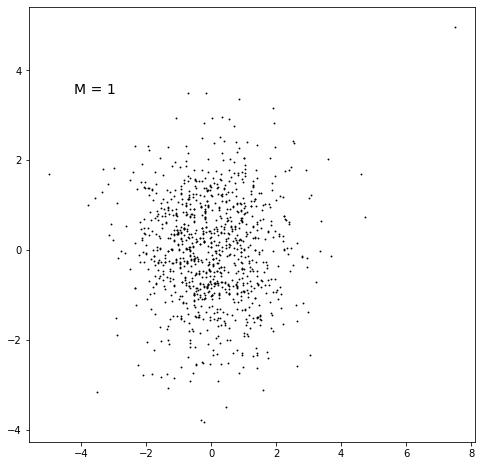

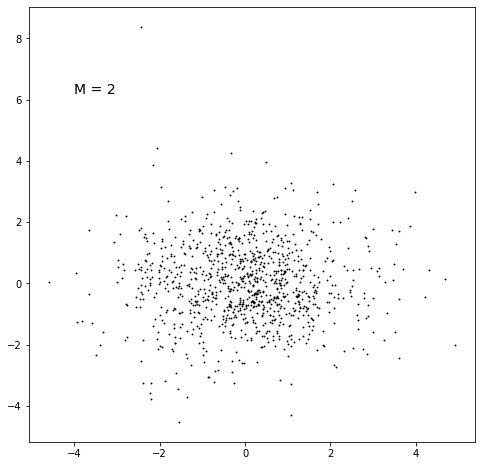

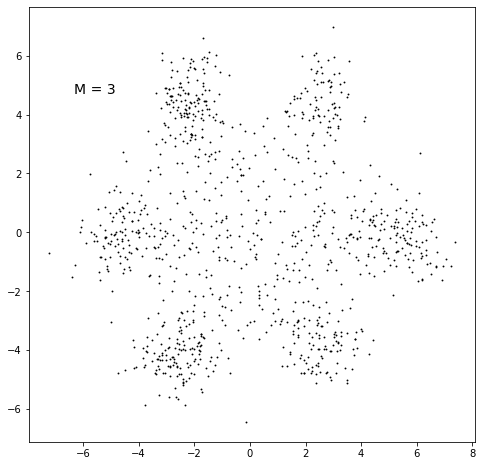

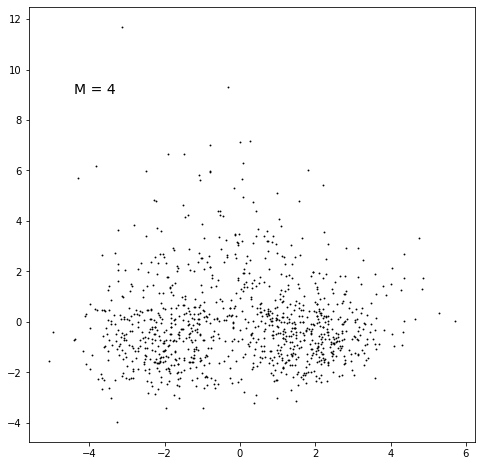

In [ ]:
xx1_PCA = PCAFreq(xx1,1)
xx2_PCA = PCAFreq(xx2,2)
xx3_PCA = PCAFreq(xx3,3)
xx4_PCA = PCAFreq(xx4,4)

# K-Medias (_K-Means_)

Por último podemos aplicar K-Medias a la tabla generada con palabras de 3 letras. Atención al detalle de que K-Medias se aplica a los __64 atributos__ (no a los dos componentes principales obtenidos via PCA), y posteriormente pueden visualizarse los resultados mediante PCA o directamente sobre la secuenciación genética.

In [ ]:
def ClustFreq(xx,k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(xx)
    clusters = kmeans.labels_
    return clusters

def plot_PCA_colors(xx_PCA,clusters):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    black_cluster = (clusters == 1)
    ax.scatter(x=xx_PCA[black_cluster][:,0],y=xx_PCA[black_cluster][:,1],color='k',
               marker='o',s=10)
    ax.scatter(x=xx_PCA[~black_cluster][:,0],y=xx_PCA[~black_cluster][:,1],
               c=clusters[~black_cluster],cmap='Paired_r',marker='o',s=10)
    plt.show()

def plot_letter_with_colors(data,clusters):
    fragmentos = [data[i:i+300] for i in range(0, len(data), 300)]
    color_map = {0:'grey',2:'red',3:'green',4:'yellow',5:'blue',6:'magenta'}
    for i,frag in enumerate(fragmentos):
        if clusters[i] == 1:
            print(frag)
        else:
            print(colored(frag, color=color_map[clusters[i]]))

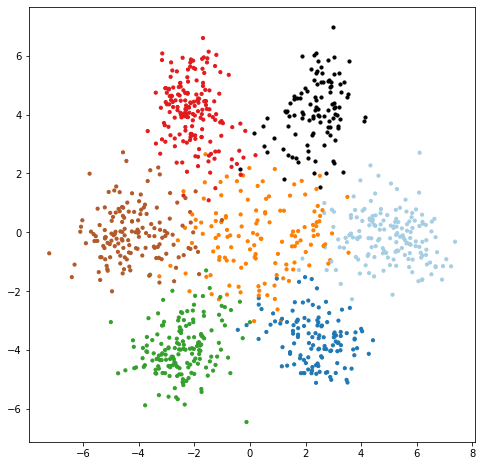

In [ ]:
clusters = ClustFreq(xx3,7) 
plot_PCA_colors(xx3_PCA,clusters)

In [ ]:
plot_letter_with_colors(data[:30000],clusters[:100])

gccgatagcctatgatccccggcaggcccggggcttggagccgtctggtttggatggaaccctccaaaccagatcaagaggctcctagaacgccgcccgcagggtcacgccccaggtgcgcgggtcgcccggctggccggcgatcaggccggtgttgctgggacccacggccagttgctcgaaatagttctcgtcgaaggcgttgcggacccaggcatagaggttcagcccctcaggcgtgcggaagccggcccggaagttagcgatcgtgtagccgtcaacccaggtgtagatcgaggg
cgaagggttggacgagaacttgctgcggtagctgccgtcatagccgacatagaactcgcccgtcttgcccaggaagtcgcccggaacattggcctcggcccccagggccacgctccacttcgaaacgcccggcagccgctgacccgagacgtcgcagttggcggggctgagcgcgccggccacgccggccgcgcgcggaacctgggttccggtcgccaccgtgccgcccgacagttccggcgggcagggcgcgtcgacaaagcgcacatacttggcgtcggtataggcggcgttcagata
ggtcgagaagcgggcgttcgggcgataggccgagtccagctccacgccttgggtgcgcaccttgccggcgttggccagatagccgcgcagcacgcccagctggccgttgctcaccgtggcctggtagttcttgatgtcgctgcggaacaccgcaaggttggccgtcagggtgcggtccagccactgggtcttcaggccgccctcgaagtgattgatgtcctcgggcttgatcgcgcctgcggcctcgatcggcttgcccgccgcatcggtcggcaggccgttctggttgatgccgccggt
cttgaagctcttggcgtaggtggcgtaggccaggacgtcacggtccagctggtagcttgccgacaggtcgtaggtgaagttccagtcgtcgaagctg

# Tareas adicionales:

A continuación pueden desarrollarse las diferentes tareas adicionales propuestas en el guión del estudio de caso...

In [ ]:
import requests 
import numpy as np 
import itertools
import pandas as pd 
import matplotlib.pyplot as plt 
from termcolor import colored 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

print('¡Librerías importadas con éxito!')

¡Librerías importadas con éxito!


In [ ]:
def LoadSeq():
    url = 'http://www.ihes.fr/~zinovyev/pcadg/ccrescentus.fa' 
    data = ''.join(requests.get(url).text.split('\r\n')[1:])
    print('Longitud de la secuenciación del genoma del Caulobacter Crescentus: {}'.format(len(data)))
    print('Primeras 25x letras de la secuenciación: {}'.format(data[2:50]))
    return data

def FindGen(_data):
    fragments3 = [_data[i:i+3] for i in range(1, 300001, 3)]
    x = np.zeros((len(fragments3)))
    for i,frag in enumerate(fragments3): 
        if frag=='atg':
            x[i] = 1
        if frag=='tga':
            x[i] = 2
        if frag=='taa':
            x[i] = 2
        if frag=='tag':
            x[i] = 2

    print("Vector de dades  ", x[:100]," -- ", len(x))
    contGen = 0
    fi = False
    for i in range(0, len(x), 1):
        if x[i]==1 and fi==False:
            print("inici ",x[i]," ", i)
            fi = True
        if x[i]==2 and fi == True:
            contGen = contGen + 1
            print("fi gen ",x[i]," ", i)
            fi = False
    print("Numero de gens totals ", contGen)

In [ ]:
data = LoadSeq()
FindGen(data)


#xx1 = CalcFreq(data,1,300);  
#xx2 = CalcFreq(data,2,300);  
xx3 = CalcFreq(data[1:],3,300);
#xx4 = CalcFreq(data,4,300); 


#PCAFreq(xx1); 
#PCAFreq(xx2); 
#PCAFreq(xx3); 
#PCAFreq(xx4);

fragn = ClustFreq(xx3,7);
#GenBrowser(data,300,fragn,13000);

Longitud de la secuenciación del genoma del Caulobacter Crescentus: 305400
Primeras 25x letras de la secuenciación: cgatagcctatgatccccggcaggcccggggcttggagccgtctggtt
Vector de dades   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.
 2. 0. 0. 0.]  --  100000
inici  1.0   244
fi gen  2.0   269
inici  1.0   271
fi gen  2.0   305
inici  1.0   362
fi gen  2.0   367
inici  1.0   427
fi gen  2.0   441
inici  1.0   444
fi gen  2.0   457
inici  1.0   610
fi gen  2.0   611
inici  1.0   642
fi gen  2.0   649
inici  1.0   671
fi gen  2.0   710
inici  1.0   716
fi gen  2.0   747
inici  1.0   792
fi gen  2.0   829
inici  1.0   855
fi gen  2.0   870
inici  1.0   906
fi gen  2.0   956
inici  1.0   1472
fi gen  2.0   1482
inici  1.0   1553
fi gen  2.0   1610
inici

# Nueva sección